## Задача Коши для ОДУ 2-го порядка

Вариант 18 

$$ y'' - \frac{x+1}{x}y' - 2\frac{x-1}{x}y = 0 \\
y(1) = 1 \\ y'(1) = 1 \\ x \in [1,2], h = 0.1 $$

Точное решение:

$$ y = \frac{e^{2x}}{3e^{2}} + \frac{(3x+1)e^{-x}}{3e} $$



Введём замену переменных $$ y' = w $$

Тогда исходное уравнение можно переписать как систему ОДУ 1-го порядка:

$$\begin{equation}
    \begin{cases}
      y' = w\\
      w' = \frac{x+1}{x}w + 2\frac{x-1}{x}y
    \end{cases}\,.
\end{equation} 
\\ y(1) = 1 \\ w(1) = 1 $$



### Метод Эйлера (явный)

In [1]:
import numpy as np

def euler_solve(func, y0, w0, h, a, b, eps):
    num_steps = int((b-a)/h)
    y = np.full(num_steps+1, np.inf)
    w = np.full(num_steps+1, np.inf)
    old_lim = y.shape[0]-1
    while(True):
        y_prev = y
        w_prev = w
        num_steps = int((b-a)/h)
        tt = np.arange(a, b+h, h) #сам отрезок х
        y = np.empty(num_steps+1)
        w = np.empty(num_steps+1)
        y[0] = y0
        w[0] = w0
        for k in range(num_steps):
            w[k+1] = w[k] + h*func(tt[k], y[k], w[k])
            y[k+1] = y[k] + h*w[k]
        if y_prev[old_lim] - y[old_lim] <= eps: #Рунге-Ромберг
            print(y_prev[old_lim] - y[old_lim])
            break
        else: 
            h = h/2
        #print(h)
        
    return tt, y, w

In [20]:
func = lambda x, y, w: ((x+1)/x)*w + 2*((x-1)/x)*y
y0 = 1
w0 = 1
b = 2
a = 1
h = 0.1
eps = 1e-3

xx1, y1, w1 = euler_solve(func, y0, w0, h, a, b, eps)
print(y1.shape)


0.0009791413343389621
(10241,)


(0.0, 5.0)

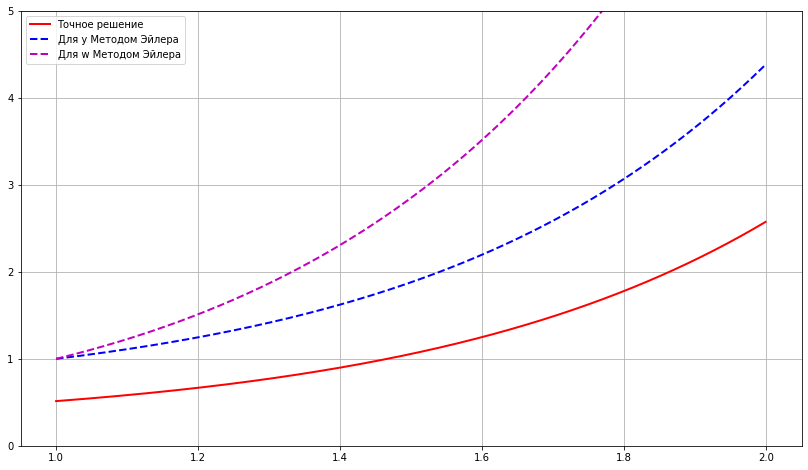

In [21]:
import matplotlib.pyplot as plt

true_func = lambda x: (np.exp(2*x))/(3*np.exp(2)) + ((3*x+1)*np.exp(-x))/(3*np.exp(1))

x_arr = np.arange(1,2,0.001)
true_arr = [true_func(xi) for xi in x_arr]

fig, ax = plt.subplots(figsize = [14,8])
ax.plot(x_arr, true_arr, 'r-', lw = 2, label = 'Точное решение')
ax.plot(xx1, y1, 'b--', lw = 2, label = "Для y Методом Эйлера")
ax.plot(xx1, w1, 'm--', lw = 2, label = "Для w Методом Эйлера")
plt.legend(loc='best')
plt.grid(True)
plt.ylim([0,5])

## Метод Рунге-Кутты 4 порядка точности

In [22]:
def RK_solve_4(func, y0, w0, h, a, b, eps):
    num_steps = int((b-a)/h)
    y = np.full(num_steps+1, np.inf)
    w = np.full(num_steps+1, np.inf)
    old_lim = y.shape[0]-1
    a1 = 0; a2 = 0.5; a3 = 0.5; a4 = 1 #коэфициенты для 4 порядка точности
    b21 = 0.5; b31 = 0; b32 = 0.5; 
    b41 = 0; b42 = 0; b43 = 0.5
    c1 = 1/6; c2 = 1/3; c3 = 1/3; c3 = 1/6
    while(True):
        y_prev = y
        w_prev = w
        num_steps = int((b-a)/h)
        tt = np.arange(a, b+h, h) #сам отрезок х
        y = np.empty(num_steps+1)
        w = np.empty(num_steps+1)
        y[0] = y0
        w[0] = w0
        for k in range(num_steps):
            Kk1 = h*func(tt[k], y[k], w[k]) #сами формулы Рунге-Кутты
            Lk1 = h*w[k]
            Kk2 = h*func(tt[k] + 0.5*h, y[k] + 0.5*Kk1, w[k] + 0.5*Lk1)
            Lk2 = h*(w[k] + 0.5*Lk1)
            Kk3 = h*func(tt[k] + 0.5*h, y[k] + 0.5*Kk2, w[k] + 0.5*Lk2 )
            Lk3 = h*(w[k] + 0.5*Lk2)
            Kk4 = h*func(tt[k] + h, y[k] + Kk3, w[k] + Lk3)
            Lk4 = h*(w[k] + Lk3)
            
            dyk = (1/6)*(Kk1 + 2*Kk2 + 2*Kk3 + Kk4)
            dwk = (1/6)*(Lk1 + 2*Lk2 + 2*Lk3 + Lk4)
            
            y[k+1] = y[k] + dyk
            w[k+1] = w[k] + dwk
        if y_prev[old_lim] - y[old_lim] <= eps: #Рунге-Ромберг
            print(y_prev[old_lim] - y[old_lim])
            break
        else: 
            h = h/2
            print(h)
    return tt, y, w

In [23]:
xx2, y2, w2 = RK_solve_4(func, y0, w0, h, a, b, 1e-3)
xx2 = xx2[0:-1]
xx2.shape

0.05
0.025
0.0125
0.00625
0.003125
0.0015625
0.00078125
0.000390625
0.0001953125
9.765625e-05
4.8828125e-05
0.0009776361986910675


(20481,)

(0.0, 5.0)

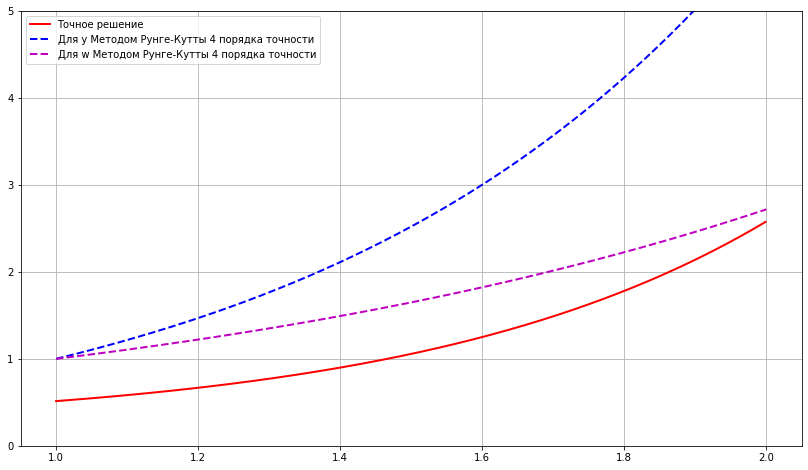

In [24]:
x_arr = np.arange(1,2,0.001)
true_arr = [true_func(xi) for xi in x_arr]

fig, ax = plt.subplots(figsize = [14,8])
ax.plot(x_arr, true_arr, 'r-', lw = 2, label = 'Точное решение')
ax.plot(xx2, y2, 'b--', lw = 2, label = "Для y Методом Рунге-Кутты 4 порядка точности")
ax.plot(xx2, w2, 'm--', lw = 2, label = "Для w Методом Рунге-Кутты 4 порядка точности")
plt.legend(loc='best')
plt.grid(True)
plt.ylim([0,5])

### Метод Адамса 4-го порядка точности


In [25]:
def Adams_solve_4(func, y0, w0, h, a, b, eps):
    num_steps = int((b-a)/h)
    y = np.full(num_steps+1, np.inf)
    w = np.full(num_steps+1, np.inf)
    old_lim = y.shape[0]-1
    a1 = 0; a2 = 0.5; a3 = 0.5; a4 = 1 #коэфициенты для метода Рунге-Кутты
    b21 = 0.5; b31 = 0; b32 = 0.5; 
    b41 = 0; b42 = 0; b43 = 0.5
    c1 = 1/6; c2 = 1/3; c3 = 1/3; c3 = 1/6
    while(True):
        y_prev = y
        w_prev = w
        num_steps = int((b-a)/h)
        tt = np.arange(a, b+h, h) #сам отрезок х
        y = np.empty(num_steps+1)
        w = np.empty(num_steps+1)
        y[0] = y0
        w[0] = w0
        for k in range(3): #первые 4 шага делаем методом Рунге-Кутты
            Kk1 = h*func(tt[k], y[k], w[k]) #сами формулы Рунге-Кутты
            Lk1 = h*w[k]
            Kk2 = h*func(tt[k] + 0.5*h, y[k] + 0.5*Kk1, w[k] + 0.5*Lk1)
            Lk2 = h*(w[k] + 0.5*Lk1)
            Kk3 = h*func(tt[k] + 0.5*h, y[k] + 0.5*Kk2, w[k] + 0.5*Lk2 )
            Lk3 = h*(w[k] + 0.5*Lk2)
            Kk4 = h*func(tt[k] + h, y[k] + Kk3, w[k] + Lk3)
            Lk4 = h*(w[k] + Lk3)
            
            dyk = (1/6)*(Kk1 + 2*Kk2 + 2*Kk3 + Kk4)
            dwk = (1/6)*(Lk1 + 2*Lk2 + 2*Lk3 + Lk4)
            
            y[k+1] = y[k] + dyk
            w[k+1] = w[k] + dwk
            
        for k in range(3, num_steps):
            w[k+1] = w[k] + (h/24)*(55*(func(tt[k], y[k], w[k])) - 59*(func(tt[k-1], y[k-1], w[k-1])) +
                                    37*(func(tt[k-2], y[k-2], w[k-2])) - 9*(func(tt[k-3], y[k-3], w[k-3])))
            y[k+1] = y[k] + (h/24)*(55*w[k] - 59*w[k-1] + 37*w[k-2] - 9*w[k-3])
            
        if y_prev[old_lim] - y[old_lim] <= eps: #Рунге-Ромберг
            #print(y_prev[old_lim] - y[old_lim])
            break
        else: 
            h = h/2
            #print(h)
    return tt, y, w

In [28]:
xx3, y3, w3 = Adams_solve_4(func, y0, w0, h, a, b, 1e-3)
xx3 = xx3[0:-1]
#xx3.shape

(0.0, 5.0)

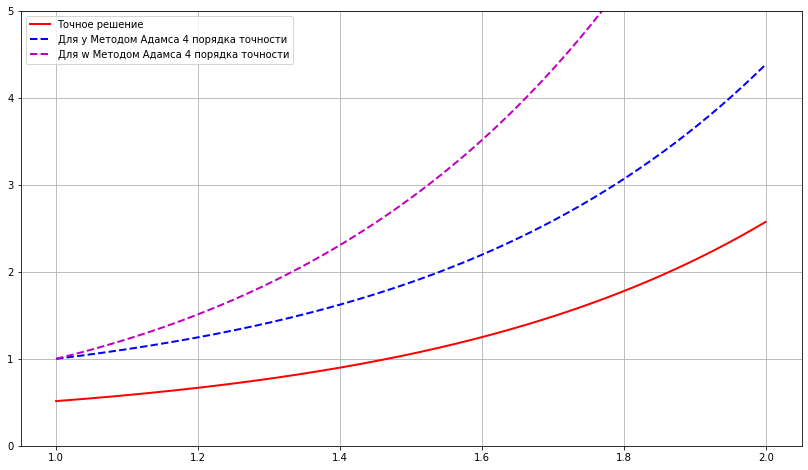

In [29]:
fig, ax = plt.subplots(figsize = [14,8])
ax.plot(x_arr, true_arr, 'r-', lw = 2, label = 'Точное решение')
ax.plot(xx3, y3, 'b--', lw = 2, label = "Для y Методом Адамса 4 порядка точности")
ax.plot(xx3, w3, 'm--', lw = 2, label = "Для w Методом Адамса 4 порядка точности")
plt.legend(loc='best')
plt.grid(True)
plt.ylim([0,5])